In [4]:
import os

# DATAPATH
directory_path = "/kaggle/input/crop-pest-and-disease-detection"

# LIST ALL FILE IN THE DIRECTORY
files = os.listdir(directory_path)


print(files)

['Tomato verticulium wilt', 'Cassava green mite', 'Cassava mosaic', 'Cashew red rust', 'Cashew gumosis', 'Tomato healthy', 'Cassava brown spot', 'Cassava bacterial blight', 'Maize leaf beetle', 'Cassava healthy', 'Maize leaf spot', 'Maize healthy', 'Tomato leaf blight', 'Cashew healthy', 'Cashew leaf miner', 'Maize streak virus', 'Tomato septoria leaf spot', 'Maize leaf blight', 'Maize grasshoper', 'Cashew anthracnose', 'Tomato leaf curl', 'Maize fall armyworm']


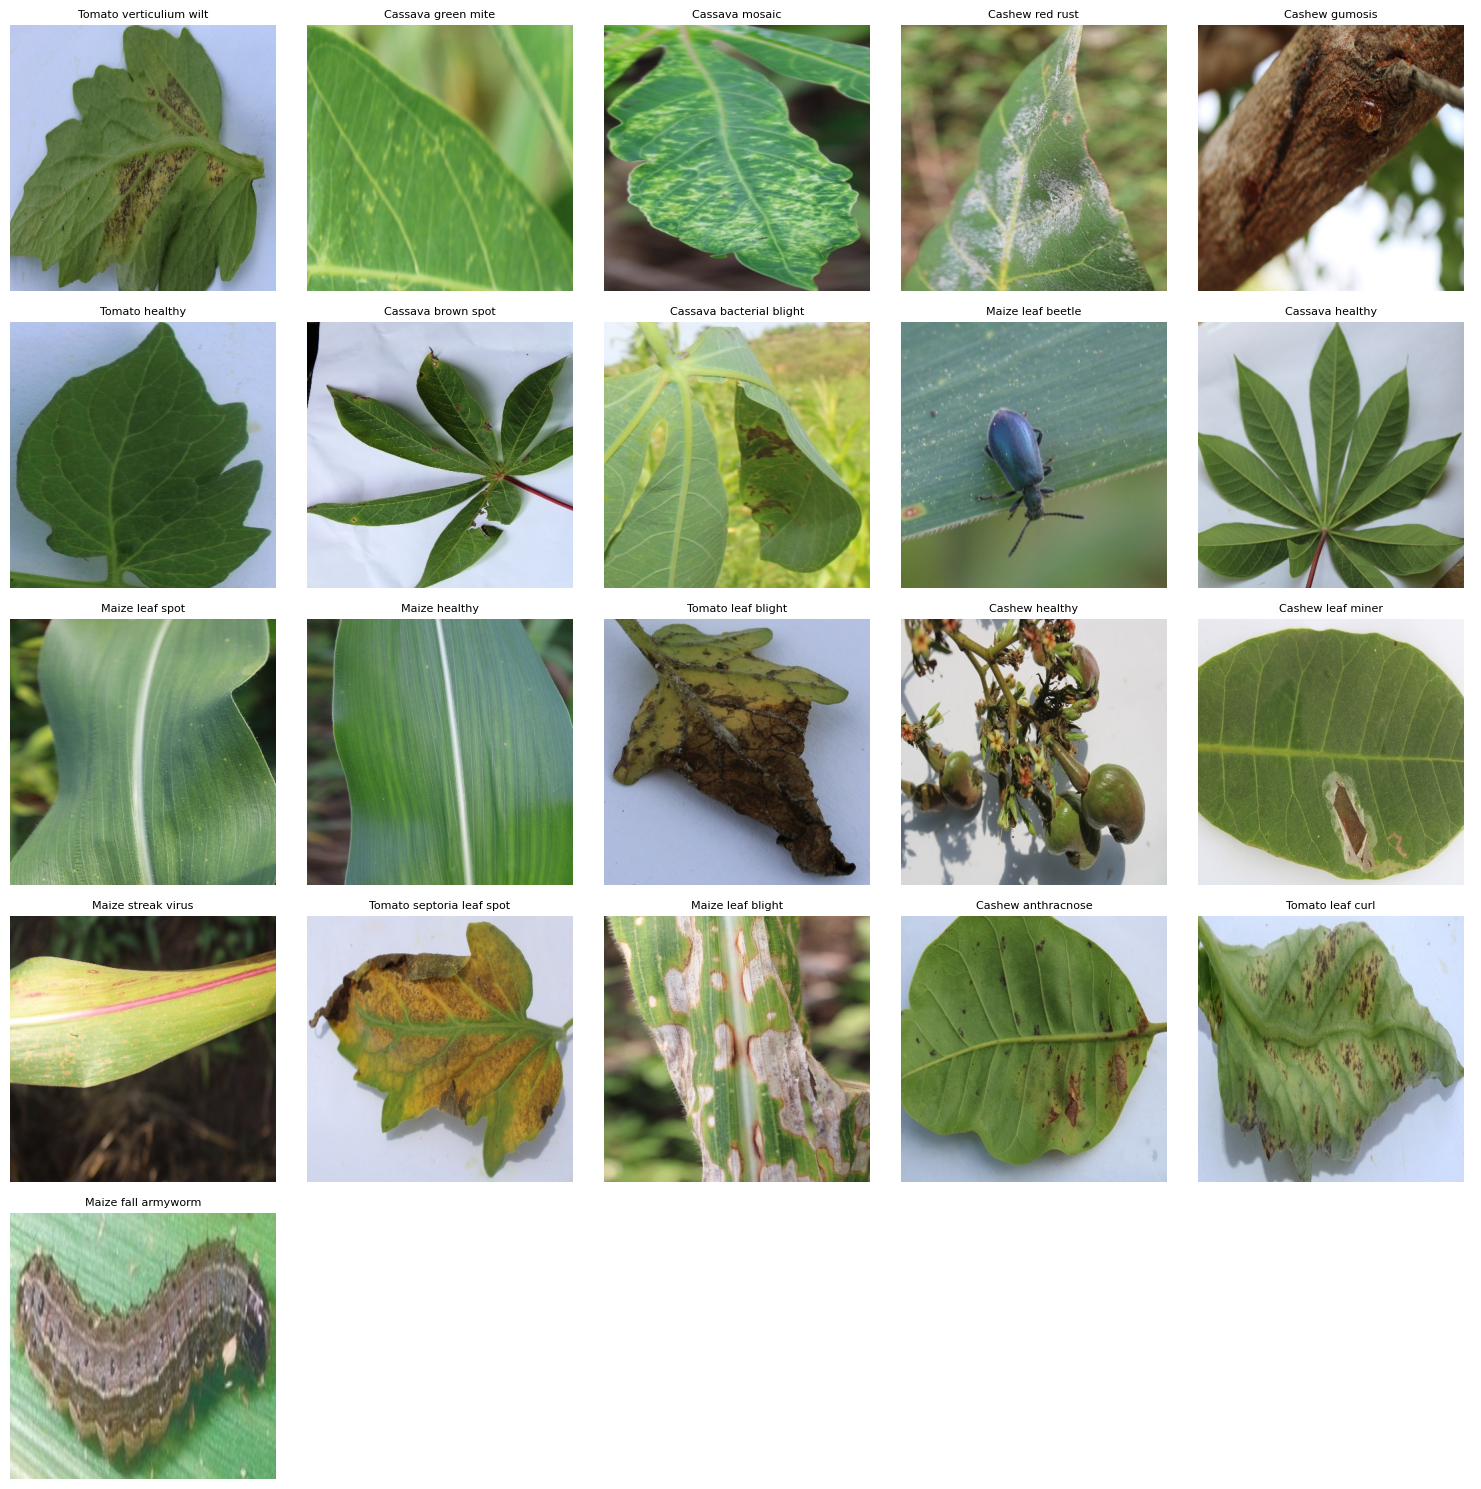

In [5]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import math

# ALL CATEGORIES LIST
categories = ['Tomato verticulium wilt', 'Cassava green mite', 'Cassava mosaic', 'Cashew red rust', 'Cashew gumosis',
              'Tomato healthy', 'Cassava brown spot', 'Cassava bacterial blight', 'Maize leaf beetle', 'Cassava healthy',
              'Maize leaf spot', 'Maize healthy', 'Tomato leaf blight', 'Cashew healthy', 'Cashew leaf miner',
              'Maize streak virus', 'Tomato septoria leaf spot', 'Maize leaf blight',
              'Cashew anthracnose', 'Tomato leaf curl', 'Maize fall armyworm']

# Define grid size
num_images = len(categories)
cols = 5  # You can change this (e.g., 4, 6) depending on your layout preference
rows = math.ceil(num_images / cols)

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 3 * rows))
axes = axes.flatten()  # Flatten to easily index in 1D

# Loop through each category and display the first image
for i, category in enumerate(categories):
    category_path = os.path.join("/kaggle/input/crop-pest-and-disease-detection", category)
    files_in_category = os.listdir(category_path)

    if files_in_category:
        image_filename = files_in_category[0]
        image_path = os.path.join(category_path, image_filename)
        img = mpimg.imread(image_path)

        axes[i].imshow(img)
        axes[i].axis('off')
        axes[i].set_title(category, fontsize=8)

# Turn off any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


2025-10-17 05:44:14.296387: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1760679854.535916      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1760679854.609676      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Premature end of JPEG file
Corrupt JPEG data: 35587 extraneous bytes before marker 0xd9
Corrupt JPEG data: 835 extraneous bytes before marker 0x5e
Corrupt JPEG data: 411 extraneous bytes before marker 0xc0
Corrupt JPEG data: 8635 extraneous bytes before marker 0xd9
Corrupt JPEG data: prema

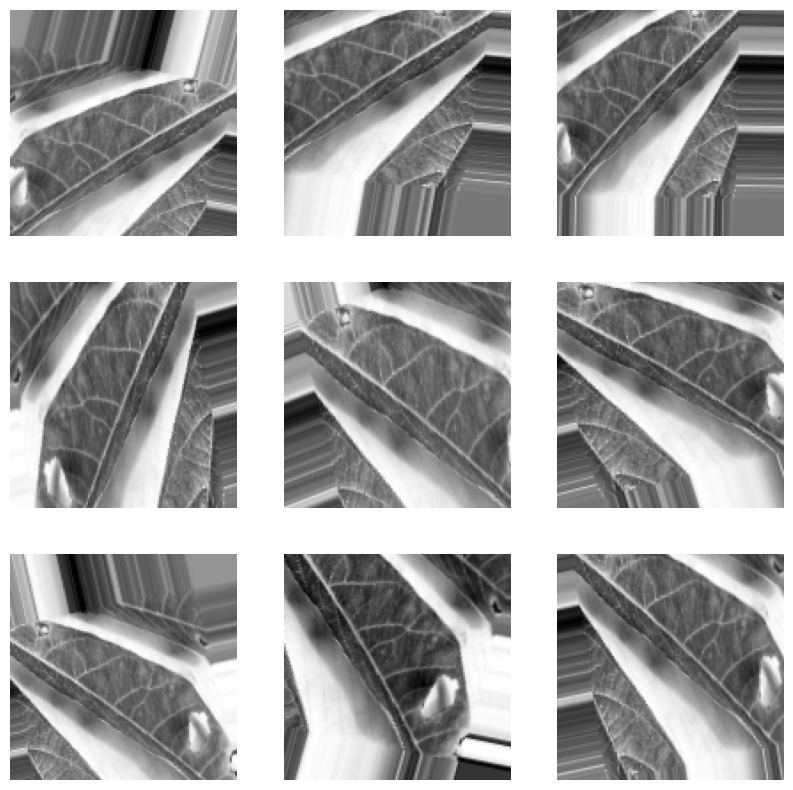

In [6]:
import os
import cv2
import numpy as np
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt

# Load and preprocess single category
def load_and_preprocess_images(directory, label, image_size=(128, 128), clahe_clip_limit=2.0):
    images, labels = [], []
    clahe = cv2.createCLAHE(clipLimit=clahe_clip_limit)

    for filename in os.listdir(directory):
        if filename.lower().endswith(".jpg"):
            file_path = os.path.join(directory, filename)
            try:
                with warnings.catch_warnings():
                    warnings.simplefilter("ignore")
                    img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)

                if img is not None:
                    img = cv2.resize(img, image_size)
                    img = clahe.apply(img)
                    images.append(img)
                    labels.append(label)
                else:
                    pass  # Skip unreadable image
            except Exception:
                pass  # Skip errors silently

    return images, labels

# Complete preprocessing pipeline
def preprocess_dataset(base_path, categories, image_size=(128, 128)):
    all_images, all_labels = [], []

    for category in categories:
        category_path = os.path.join(base_path, category)
        images, labels = load_and_preprocess_images(category_path, category, image_size)
        all_images.extend(images)
        all_labels.extend(labels)

    all_images = np.array(all_images)
    all_labels = np.array(all_labels)

    # Add channel dimension if grayscale
    if len(all_images.shape) == 3:
        all_images = np.expand_dims(all_images, axis=-1)

    # Normalize images
    all_images = all_images.astype('float32') / 255.0

    # Encode labels
    label_encoder = LabelEncoder()
    labels_encoded = label_encoder.fit_transform(all_labels)
    labels_one_hot = to_categorical(labels_encoded)

    # Split dataset
    X_train, X_test, y_train, y_test = train_test_split(
        all_images, labels_one_hot, test_size=0.2, random_state=42, stratify=labels_encoded
    )

    return X_train, X_test, y_train, y_test, label_encoder

# Dataset settings
categories = ['Tomato verticulium wilt', 'Cassava green mite', 'Cassava mosaic', 'Cashew red rust', 'Cashew gumosis',
              'Tomato healthy', 'Cassava brown spot', 'Cassava bacterial blight', 'Maize leaf beetle', 'Cassava healthy',
              'Maize leaf spot', 'Maize healthy', 'Tomato leaf blight', 'Cashew healthy', 'Cashew leaf miner',
              'Maize streak virus', 'Tomato septoria leaf spot', 'Maize leaf blight',
              'Cashew anthracnose', 'Tomato leaf curl', 'Maize fall armyworm']
base_path = "/kaggle/input/crop-pest-and-disease-detection"
# Run preprocessing
X_train, X_test, y_train, y_test, label_encoder = preprocess_dataset(base_path, categories)

# Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Visualize augmented examples
plt.figure(figsize=(10, 10))
for i in range(9):
    augmented_image = datagen.random_transform(X_train[0])
    plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_image.squeeze(), cmap='gray')
    plt.axis('off')
plt.show()


In [4]:
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (19597, 128, 128, 1)
Shape of y_train: (19597, 21)
Shape of X_test: (4900, 128, 128, 1)
Shape of y_test: (4900, 21)


In [5]:
#EfficientNetB0
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import layers, models, optimizers

# Convert grayscale to RGB for EfficientNet (expects 3 channels)
X_train_rgb = np.repeat(X_train, 3, axis=-1)
X_test_rgb = np.repeat(X_test, 3, axis=-1)

# Build model using EfficientNetB0 with random initialization (no weights)
base_model = EfficientNetB0(weights=None, include_top=False, input_shape=(128, 128, 3))
base_model.trainable = True  # Fine-tune the whole model

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.4),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(len(label_encoder.classes_), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Train the model
history = model.fit(
    datagen.flow(X_train_rgb, y_train, batch_size=32),
    validation_data=(X_test_rgb, y_test),
    steps_per_epoch=len(X_train) // 32,
    epochs=5
)


I0000 00:00:1744776344.911655      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1744776344.912308      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)          │ (None, 4, 4, 1280)          │       4,049,571 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1280)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         327,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 21)                  │           5,397 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,382,904 (16.72 MB)

 Trainable params: 4,340,881 (16.56 MB)

 Non-trainable params: 42,023 (164.16 KB)

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1744776401.880402      98 service.cc:148] XLA service 0x7b5c29226ca0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1744776401.881508      98 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1744776401.881537      98 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1744776406.834108      98 cuda_dnn.cc:529] Loaded cuDNN version 90300
E0000 00:00:1744776414.897582      98 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing war

  1/612 ━━━━━━━━━━━━━━━━━━━━ 15:06:29 89s/step - accuracy: 0.0312 - loss: 3.1156

I0000 00:00:1744776436.495853      98 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


415/612 ━━━━━━━━━━━━━━━━━━━━ 23s 117ms/step - accuracy: 0.1253 - loss: 2.9529

E0000 00:00:1744776495.647648      98 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1744776495.782202      98 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1744776496.174677      98 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1744776496.313026      98 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


612/612 ━━━━━━━━━━━━━━━━━━━━ 207s 193ms/step - accuracy: 0.1424 - loss: 2.8795 - val_accuracy: 0.0384 - val_loss: 5.9980
Epoch 2/5
  1/612 ━━━━━━━━━━━━━━━━━━━━ 1:00 99ms/step - accuracy: 0.2188 - loss: 2.6268

/usr/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


612/612 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2188 - loss: 2.6268 - val_accuracy: 0.0384 - val_loss: 6.4048
Epoch 3/5
612/612 ━━━━━━━━━━━━━━━━━━━━ 74s 120ms/step - accuracy: 0.2769 - loss: 2.3279 - val_accuracy: 0.2037 - val_loss: 2.8172
Epoch 4/5
612/612 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3125 - loss: 2.1911 - val_accuracy: 0.1929 - val_loss: 3.0003
Epoch 5/5
612/612 ━━━━━━━━━━━━━━━━━━━━ 76s 123ms/step - accuracy: 0.3341 - loss: 2.1115 - val_accuracy: 0.2094 - val_loss: 3.3107


In [6]:
from tensorflow.keras import layers, models, Input
from tensorflow.keras.applications import MobileNetV2

num_classes = 21  # Replace this with your actual number of classes

inputs = Input(shape=(128, 128, 1))
x = layers.Conv2D(3, (3, 3), padding='same')(inputs)  # Convert grayscale to 3 channels
base_model = MobileNetV2(include_top=False, input_shape=(128, 128, 3), weights=None)
x = base_model(x)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(num_classes, activation='softmax')(x)

model = models.Model(inputs, outputs)


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train
model.fit(X_train, y_train, epochs=10, batch_size=100, validation_data=(X_test, y_test))


Epoch 1/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 112s 261ms/step - accuracy: 0.1475 - loss: 2.8401 - val_accuracy: 0.1067 - val_loss: 2.9835
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 22s 113ms/step - accuracy: 0.2678 - loss: 2.4048 - val_accuracy: 0.1067 - val_loss: 2.9736
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 23s 117ms/step - accuracy: 0.3067 - loss: 2.2031 - val_accuracy: 0.1067 - val_loss: 3.1246
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 22s 112ms/step - accuracy: 0.3470 - loss: 2.0716 - val_accuracy: 0.1067 - val_loss: 3.4035
Epoch 5/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 22s 112ms/step - accuracy: 0.3713 - loss: 1.9545 - val_accuracy: 0.1067 - val_loss: 3.6085
Epoch 6/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 22s 114ms/step - accuracy: 0.4023 - loss: 1.8250 - val_accuracy: 0.1067 - val_loss: 3.8491
Epoch 7/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 22s 114ms/step - accuracy: 0.4312 - loss: 1.7265 - val_accuracy: 0.1067 - val_loss: 3.8560
Epoch 8/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 22s 113ms/step - accuracy: 0.4528 - loss: 

In [10]:
#MobileNetV2
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models, Input
from tensorflow.keras.applications import MobileNetV2

img_size = 128

X = []
y = []

class_names = sorted(os.listdir(data_dir))  # Automatically detect class folders
num_classes = len(class_names)              # Get actual number of classes

for class_index, class_name in enumerate(class_names):
    class_path = os.path.join(data_dir, class_name)
    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)
        try:
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (img_size, img_size))
            X.append(img)
            y.append(class_index)
        except:
            pass

X = np.array(X).astype("float32") / 255.0
X = np.expand_dims(X, axis=-1)  # Add channel dimension for grayscale
y = to_categorical(y, num_classes=num_classes)

# -------------------------
# Split Dataset
# -------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -------------------------
# Build Model with MobileNetV2
# -------------------------
inputs = Input(shape=(img_size, img_size, 1))
x = layers.Conv2D(3, (3, 3), padding='same')(inputs)  # Convert 1 channel to 3
base_model = MobileNetV2(include_top=False, input_shape=(img_size, img_size, 3), weights=None)
x = base_model(x)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(num_classes, activation='softmax')(x)

model = models.Model(inputs, outputs)

# -------------------------
# Compile and Train
# -------------------------
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=20, batch_size=100, validation_data=(X_test, y_test))


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 845 extraneous bytes before marker 0x8a
Corrupt JPEG data: 835 extraneous bytes before marker 0x5e
Corrupt JPEG data: 411 extraneous bytes before marker 0xc0
Corrupt JPEG data: 8635 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 1793 extraneous bytes before marker 0x9e
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 60 extraneous bytes before marker 0xdb
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 1115 extraneous bytes before marker 0xb4
Corrupt JPEG data: 37 extraneous bytes before marker 0xdb
Corrupt JPEG data: 29941 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premat

Epoch 1/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 103s 246ms/step - accuracy: 0.1625 - loss: 2.8741 - val_accuracy: 0.1051 - val_loss: 3.0193
Epoch 2/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 23s 113ms/step - accuracy: 0.2471 - loss: 2.4554 - val_accuracy: 0.1051 - val_loss: 3.0176
Epoch 3/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 23s 115ms/step - accuracy: 0.2984 - loss: 2.2461 - val_accuracy: 0.1077 - val_loss: 3.1829
Epoch 4/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 23s 111ms/step - accuracy: 0.3401 - loss: 2.1233 - val_accuracy: 0.1077 - val_loss: 3.4250
Epoch 5/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 22s 111ms/step - accuracy: 0.3626 - loss: 2.0030 - val_accuracy: 0.1077 - val_loss: 3.5796
Epoch 6/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 23s 113ms/step - accuracy: 0.3828 - loss: 1.9155 - val_accuracy: 0.1077 - val_loss: 4.3761
Epoch 7/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 23s 113ms/step - accuracy: 0.4189 - loss: 1.7755 - val_accuracy: 0.1077 - val_loss: 4.2700
Epoch 8/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 23s 112ms/step - accuracy: 0.4323 - loss: 

In [2]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# === CONFIG ===
EPOCHS = 10
IMAGE_SIZE = (128, 128)
INPUT_SHAPE = (128, 128, 3)
BATCH_SIZE = 64
LEARNING_RATE = 0.001
DATASET_DIR = "/kaggle/input/crop-pest-and-disease-detection"
CLASS_NAMES = ['Cashew', 'Cassava', 'Maize', 'Tomato']

2025-04-17 09:49:00.444083: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744883340.706928      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744883340.781253      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
# === HELPERS ===
def get_disease_category_by_path(file_path):
    return file_path.split("/")[4]

def get_plant_category_by_path(file_path):
    disease_category = get_disease_category_by_path(file_path)
    return disease_category.split(" ")[0]

def clean_image_dataframe(df):
    for image in df['filename']:
        try:
            img = tf.io.read_file(image)
            img = tf.io.decode_jpeg(img)
        except:
            index = df[(df.filename == image)].index
            df = df.drop(index)
    return df

In [4]:
def encode_label(label):
    return CLASS_NAMES.index(label)

# === LOAD FILES INTO DATAFRAME ===
filenames, plant_category, disease_category = [], [], []
for (root, dirs, files) in os.walk(DATASET_DIR):
    for filename in files:
        fn = os.path.join(root, filename)
        if filename.endswith(".jpg") or filename.endswith(".jpeg") or filename.endswith(".png"):
            filenames.append(fn)
            pc = get_plant_category_by_path(fn)
            dc = get_disease_category_by_path(fn)
            plant_category.append(pc)
            disease_category.append(dc)


In [5]:
df = pd.DataFrame({
    "filename": filenames,
    "plant category": plant_category,
    "disease category": disease_category
}).sample(frac=1)

df = clean_image_dataframe(df)
df['label'] = df['plant category'].apply(encode_label)

I0000 00:00:1744883405.046098      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1744883405.046747      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5
Corrupt JPEG data: 29941 extraneous bytes before marker 0xd9
JPEG datastream contains no image
Corrupt JPEG data: premature end of data segment
Unsupported marker type 0x45
Corrupt JPEG data: premature end of data segment
Unsupported marker type 0x94
Corrupt JPEG data: premature end of data segment
Unsupported marker type 0xde
Unsupported marker type 0xf0
Corrupt JPEG data: 31005 extraneous bytes before marker 0xd9
JPEG datastream contains no image
Corrupt JPEG data: premature end of data segment
Unsupported marker type 0x1b
Corrupt JPEG data: 35587 ex

In [13]:
# === TRAIN / VAL / TEST SPLIT ===
train_df, test_df = train_test_split(df, test_size=0.2, stratify=df['label'], random_state=42)
train_df, val_df = train_test_split(train_df, test_size=0.2, stratify=train_df['label'], random_state=42)


In [14]:
def df_to_dataset(df):
    path_ds = tf.data.Dataset.from_tensor_slices(df['filename'].values)
    image_ds = path_ds.map(lambda x: tf.image.resize(tf.image.convert_image_dtype(tf.image.decode_jpeg(tf.io.read_file(x)), tf.float32), IMAGE_SIZE))
    label_ds = tf.data.Dataset.from_tensor_slices(df['label'].values)
    return tf.data.Dataset.zip((image_ds, label_ds)).batch(BATCH_SIZE).prefetch(buffer_size=tf.data.AUTOTUNE)

train_ds = df_to_dataset(train_df)
validation_ds = df_to_dataset(val_df)
test_ds = df_to_dataset(test_df)

In [24]:
# === VGG16 BACKBONE (OFFLINE FRIENDLY) ===
try:
    base_model = tf.keras.applications.VGG16(
        include_top=False,
        input_shape=INPUT_SHAPE,
        weights='/kaggle/input/vgg16-/other/default/1/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'  # Switch to None if no internet
    )
except:
    print("⚠️ Failed to download weights. Using untrained VGG16 instead.")
    base_model = tf.keras.applications.VGG16(
        include_top=False,
        input_shape=INPUT_SHAPE,
        weights=None
    )

base_model.trainable = False

In [25]:
# === FINAL MODEL ===
model = tf.keras.models.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.2),
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(len(CLASS_NAMES))
])

In [26]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"]
)

Epoch 1/10
252/252 ━━━━━━━━━━━━━━━━━━━━ 39s 148ms/step - accuracy: 0.4715 - loss: 1.2161 - val_accuracy: 0.7915 - val_loss: 0.6730
Epoch 2/10
252/252 ━━━━━━━━━━━━━━━━━━━━ 36s 141ms/step - accuracy: 0.7619 - loss: 0.7103 - val_accuracy: 0.8264 - val_loss: 0.5273
Epoch 3/10
252/252 ━━━━━━━━━━━━━━━━━━━━ 36s 141ms/step - accuracy: 0.7923 - loss: 0.5937 - val_accuracy: 0.8433 - val_loss: 0.4625
Epoch 4/10
252/252 ━━━━━━━━━━━━━━━━━━━━ 36s 143ms/step - accuracy: 0.8053 - loss: 0.5416 - val_accuracy: 0.8510 - val_loss: 0.4300
Epoch 5/10
252/252 ━━━━━━━━━━━━━━━━━━━━ 36s 142ms/step - accuracy: 0.8168 - loss: 0.5107 - val_accuracy: 0.8550 - val_loss: 0.4061
Epoch 6/10
252/252 ━━━━━━━━━━━━━━━━━━━━ 36s 142ms/step - accuracy: 0.8209 - loss: 0.4935 - val_accuracy: 0.8597 - val_loss: 0.3891
Epoch 7/10
252/252 ━━━━━━━━━━━━━━━━━━━━ 36s 142ms/step - accuracy: 0.8225 - loss: 0.4753 - val_accuracy: 0.8674 - val_loss: 0.3723
Epoch 8/10
252/252 ━━━━━━━━━━━━━━━━━━━━ 36s 142ms/step - accuracy: 0.8332 - loss: 0

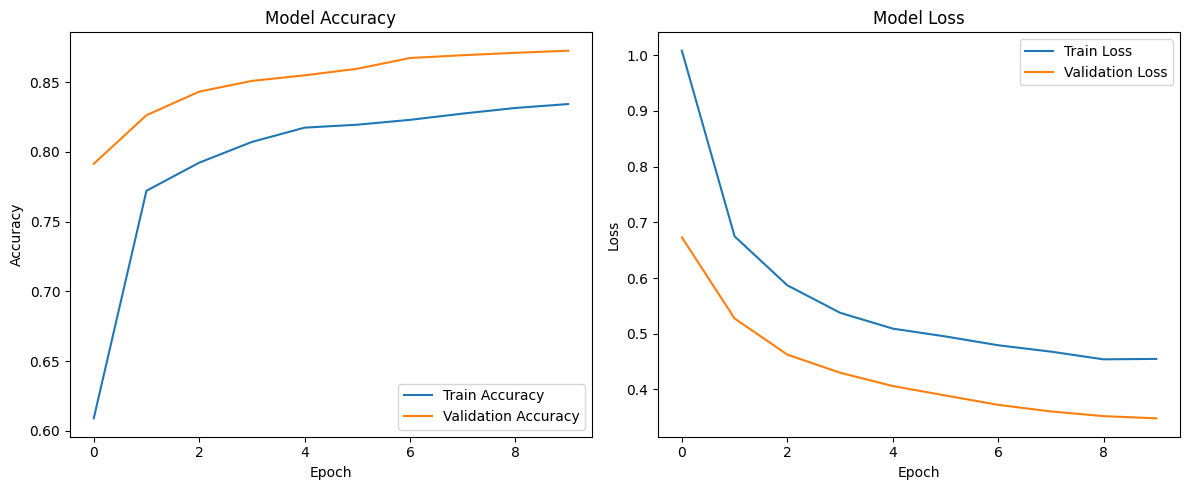

In [27]:
# === TRAIN MODEL ===
history = model.fit(train_ds, epochs=EPOCHS, validation_data=validation_ds)

# === EVALUATE ===
results = model.evaluate(test_ds, return_dict=True)
print(f"\n✅ Test Accuracy: {results['accuracy']:.4f}")

# === VISUALIZE TRAINING ===
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Model Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Model Loss")

plt.tight_layout()
plt.show()

In [29]:
# === PREDICTIONS (OPTIONAL) ===
y_pred = model.predict(test_ds)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.concatenate([y for x, y in test_ds], axis=0)

79/79 ━━━━━━━━━━━━━━━━━━━━ 8s 105ms/step


<Figure size 400x400 with 0 Axes>

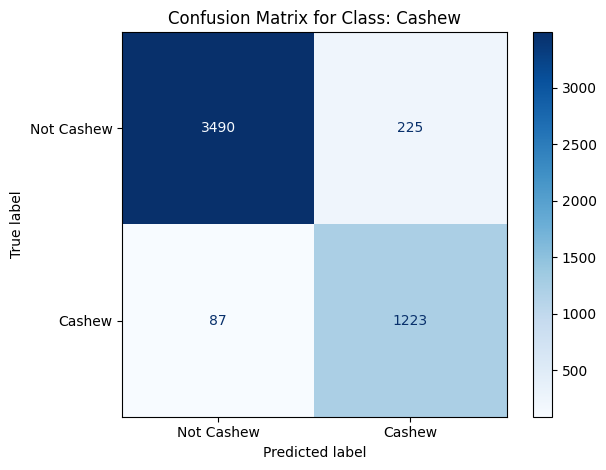

<Figure size 400x400 with 0 Axes>

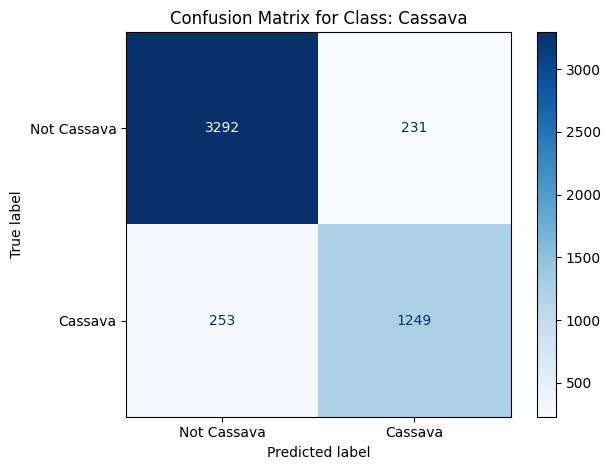

<Figure size 400x400 with 0 Axes>

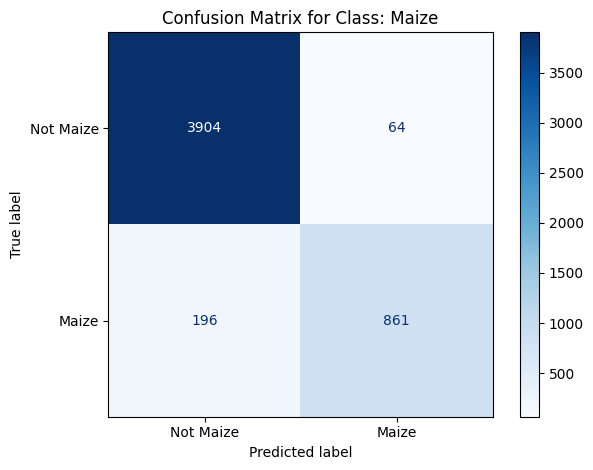

<Figure size 400x400 with 0 Axes>

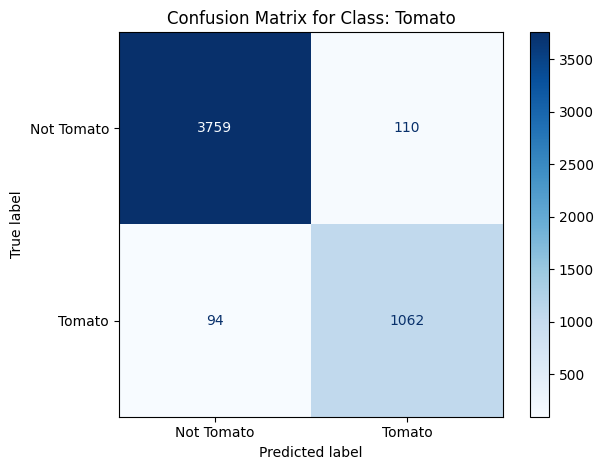

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

num_classes = len(CLASS_NAMES)

for i in range(num_classes):
    binary_true = (y_true == i).astype(int)
    binary_pred = (y_pred == i).astype(int)

    cm = confusion_matrix(binary_true, binary_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[f"Not {CLASS_NAMES[i]}", CLASS_NAMES[i]])

    plt.figure(figsize=(4, 4))
    disp.plot(cmap='Blues', values_format='d')
    plt.title(f"Confusion Matrix for Class: {CLASS_NAMES[i]}")
    plt.grid(False)
    plt.tight_layout()
    plt.show()


In [33]:
from sklearn.metrics import classification_report, accuracy_score

# Overall classification report
report = classification_report(y_true, y_pred, target_names=CLASS_NAMES, output_dict=True)

import pandas as pd

# Convert to DataFrame
report_df = pd.DataFrame(report).transpose()

# Display the report for each class
print(report_df)

# Save as CSV (optional)
report_df.to_csv("classification_report.csv")

# Print accuracy separately
overall_accuracy = accuracy_score(y_true, y_pred)
print(f"\nOverall Accuracy: {overall_accuracy:.4f}")


              precision    recall  f1-score      support
Cashew         0.844613  0.933588  0.886875  1310.000000
Cassava        0.843919  0.831558  0.837693  1502.000000
Maize          0.930811  0.814570  0.868819  1057.000000
Tomato         0.906143  0.918685  0.912371  1156.000000
accuracy       0.874627  0.874627  0.874627     0.874627
macro avg      0.881372  0.874600  0.876439  5025.000000
weighted avg   0.876692  0.874627  0.874241  5025.000000

Overall Accuracy: 0.8746
